# Import Libraries 

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization,  Conv2D, MaxPool2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Load the Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Data Preprocessing

In [3]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [4]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# CNN Model Building

In [5]:
cnn = tf.keras.models.Sequential()

### Adding the first Convolutional Layer

In [6]:
print('x_train shape:', x_train.shape)

x_train shape: (50000, 32, 32, 3)


In [7]:
cnn.add(tf.keras.layers.Conv2D(32, (3, 3) , padding='same', activation='relu', input_shape=x_train.shape[1:]))
cnn.add(BatchNormalization())

C:\Users\Abdallah\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Adding the second Convolutional Layer

In [8]:
cnn.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same' , activation='relu', input_shape=x_train.shape[1:]))
cnn.add(BatchNormalization())

### Adding Pooling layer and Dropout layer 

In [9]:
cnn.add(MaxPool2D(pool_size=(2, 2)))
cnn.add(Dropout(rate=0.25))

### Adding the last Convolutional Layer

In [10]:
cnn.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=x_train.shape[1:]))
cnn.add(BatchNormalization())


### Adding a second Pooling layer and a second Dropout layer

In [12]:
cnn.add(MaxPool2D(pool_size=(2, 2)))
cnn.add(Dropout(rate=0.25))

### Adding a Flatten layer

In [13]:
cnn.add(tf.keras.layers.Flatten())

### Full Connection 

In [14]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Adding the Output layer

In [15]:
cnn.add(tf.keras.layers.Dense(units=10, activation='softmax'))

# Training the CNN

### Data Augmentations

In [16]:
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True, channel_shift_range=0.1)
train_generator = data_generator.flow(x_train, y_train, 32)

### Compiling the CNN

In [17]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [21]:
model = cnn.fit(train_generator, 
              epochs=30,
              validation_data=(x_test, y_test) 
#               callbacks=[early_stop],
#               batch_size=batch_size,
             )

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.7745 - loss: 0.6422 - val_accuracy: 0.7753 - val_loss: 0.6889
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.7809 - loss: 0.6275 - val_accuracy: 0.7809 - val_loss: 0.6847
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.7866 - loss: 0.6126 - val_accuracy: 0.7762 - val_loss: 0.6772
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.7922 - loss: 0.6048 - val_accuracy: 0.7642 - val_loss: 0.7037
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.7931 - loss: 0.5918 - val_accuracy: 0.7773 - val_loss: 0.6788
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.7923 - loss: 0.5982 - val_accuracy: 0.7653 - val_loss: 0.7456
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.7976 - loss: 0.5845 - val_accuracy: 0.7991 - val_loss: 0.6181
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.7974 -

In [23]:
test_loss, test_accuracy = cnn.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8188 - loss: 0.5761
Test accuracy: 0.82


### Testing on one image

 Image 100 is [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
The model predict that image 100 is 4


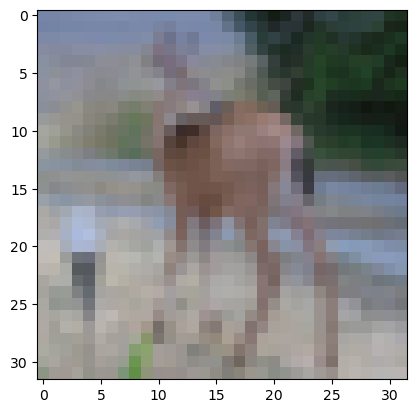

In [35]:
my_image = x_test[100]
plt.imshow(my_image)

# that's a Deer
print(f" Image 100 is {y_test[100]}")

# correctly predicted as a Deer
pred_100 = np.argmax(cnn.predict(my_image.reshape(1, 32, 32, 3)))
print(f"The model predict that image 100 is {pred_100}")

### Testing on four random images

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


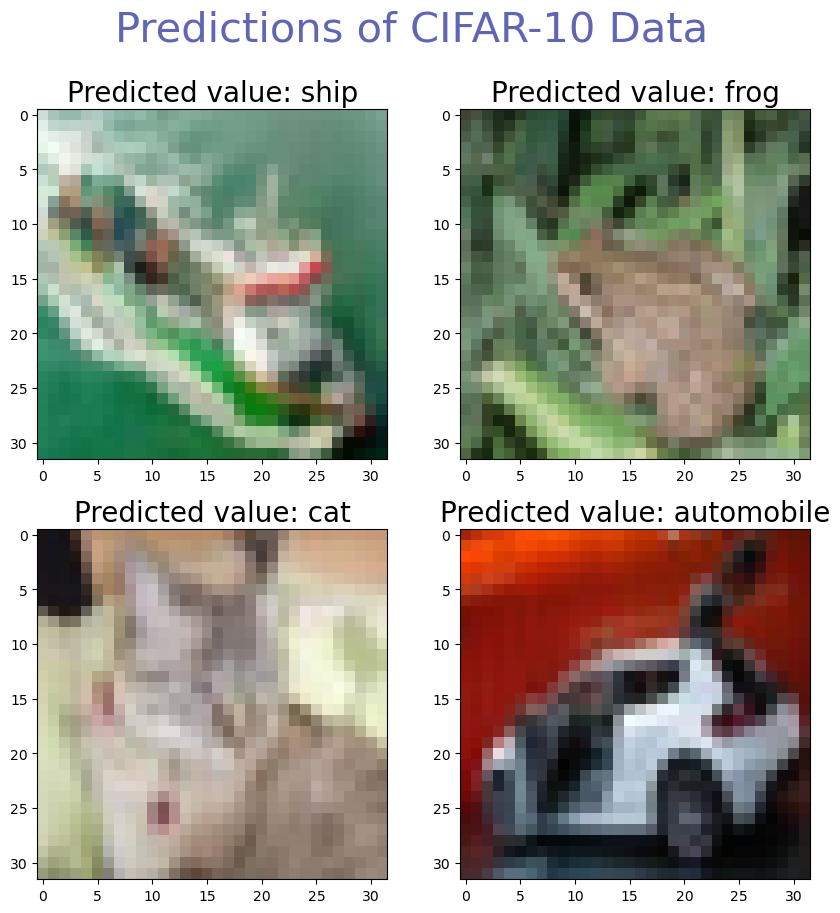

In [38]:
predictions = cnn.predict(x_test)

plt.figure(figsize=[10,10])

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.subplot(2,2,1)
n = 15
plt.imshow(x_test[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
plt.grid(False)

plt.subplot(2,2,2)
n = 4
plt.imshow(x_test[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
plt.grid(False)

plt.subplot(2,2,3)
n = 8
plt.imshow(x_test[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
plt.grid(False)

plt.subplot(2,2,4)
n = 6
plt.imshow(x_test[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
plt.grid(False)

plt.suptitle("Predictions of CIFAR-10 Data", size=30, color="#6166B3")

plt.show()

In [41]:
from tensorflow.keras.models import load_model

cnn.save('cnn_30_epochs.keras')